## Advanced Machine Learning - Scikit Learn 
### with Adreas Mueller

## Linear Models for Regression
* How to control complexity for linear models
* Linear models are easy to understand, fast to train
* Particularly useful when little training data is available, or for large feature spaces (e.g., text classification)

y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_

### All linear models
* Learn the coefficient parameter, to make predictions of the linear combinations of features
* Prediction (y_pred) for single data point is the sum of all the features (x_test) each weighted by the corresponding coefficient, plus the intercept
* Thus, regression is the sum of products of features and their coefficients, with an offset given by the intercept

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Compare regression models on toy data set
* Data set created as linear relation between input features (X) and output variable (y), with some additive noise
* 80 points, 30 features, with only 10 features actually informative

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y, true_coefficient = make_regression(n_samples=80, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
print(X_train.shape)
print(y_train.shape)

(60, 30)
(60,)


## Linear Regression
The difference between different linear model is the demands that are put on the coefficients and the intercept, in addition to fitting the training data well; additional restrictions are also known as 'regularization'.
* Performance on the training data is quite good, with model accuracy of 0.88
* However, this does not carry over to the test set, with has accuaracy of only 0.49
* Clearly, we are overfitting with this model to the training data

In [3]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
print("R^2 on training set: %f" % linear_regression.score(X_train, y_train))
print("R^2 on test set: %f" % linear_regression.score(X_test, y_test))

R^2 on training set: 0.877842
R^2 on test set: 0.492723


#### Look at performance with the 'true' model: 
* As we know the true coefficients that generated this response y
* Here it is an R^2 of 0.73; which is the best test set performance that we could hope for     

In [4]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

0.729977472078


### Plot Coefficients learned by linear regression model
Indices of the features are plotted on the x-axis and coefficients ploted on the y-axis 
* Blue dots show true coefficients, orange dots show what was learned by linear regression model
* Many of the coefficients for the relevant features (on left) are captured, though with some noise
* However, linear regression also finds rather large coefficient for features not related to the regression target (y)

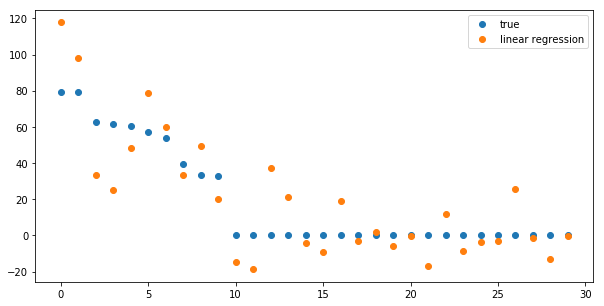

In [7]:
plt.figure(figsize=(10, 5))
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], "o", label="true")
plt.plot(linear_regression.coef_[coefficient_sorting], "o", label="linear regression")

plt.legend() 

## Ridge Regression (L2 Penalty)
Two kinds of restrictions on coefficients (i.e., regularization), commonly used for linear models, L1, L2 penalties
* Linear regression with L2 penalties ("shrinkage") is called Ridge Regression 
* L2 penalty encourages all ceofficients to be small, towards but not equal to zero (limits complexity of model)
* Alpha, the 'shrinkage' parameter, control how much the ceofficients are shrunk (large alpha means closer to zero)

### Compare Ridge models with 4 different alpha settings:
R^2 scores are given on y-axis, and different levels of alpha are plotted on x-axis
* For large alpha, the coefficients are pushed too far towards zero; both training and test scores are small
* Increasing alpha means less and less restriction on the coefficients, training scores keep improving
* However, with too little regularization, the model overfits, and degrades to solution from linear regression 

##### Typical example of tradeoff between overfitting and underfitting!

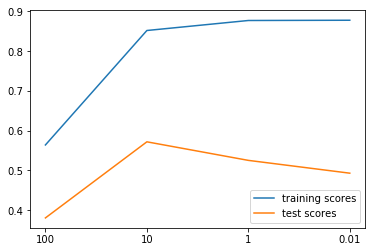

In [10]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge
    
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [100,10,1,0.01])
plt.legend(loc="best")

### Next plot compares coefficients for different settings of alpha with the true model
* Plot shows that the higher the alpha, the closer the coefficients are to zero
* This restrict the influence of unimportant features, and leads to better generalization
* For too large alpha, the coefficients of the important features are pushed toward zero, model cannot learn the task

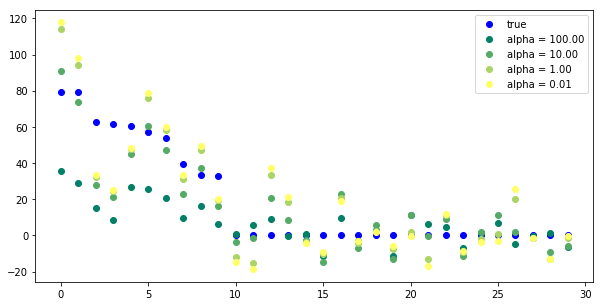

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([100, 10, 1, .01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

## Lasso (L1 penalty) Regression
Similar to L2, the L1 penalty pushes coefficients closer to zero; pushing non-important features to zero
* Lasso forces some coefficients to be exactly zero, and in this way performs variables selection
* "Sparse model", takes only a subset of features into account
* Alpha parameter controls how regularized model will be; how few features will be included in model

### Compare models with different levels of alpha 
* Plot shows the expected tradeoff between overfit and underfit

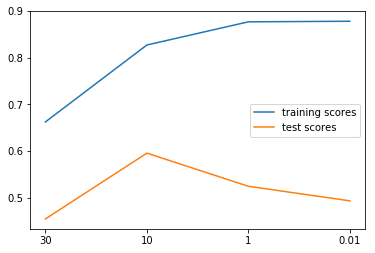

In [12]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, .01]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso
    
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [30,10,1,0.01])
plt.legend(loc="best")

### Plot Coefficients for resulting lasso models
Even for alpha equal to 1 or 10, a lot of unimportant features have coefficients of zero, are ignored by model
* Important features are not shrunk that much compared to Ridge Regression model (though some ignored for high alpha)
* If we compare scores for lasso and ridge, we can see that Lasso clearly outperforms Ridge regression
  (Response y was generated using only subset of features, i.e., the true coefficients are sparse)

### Sparse Data
* Lasso is good model for sparse datasets, in which many features not related to the target variable of interest
* Elastic net combines both L1 and L2 penalties, works quite well in practice. 
* Ridge and Lasso approaches work well with high dimensional data, with few samples compared to number of features (n<p)

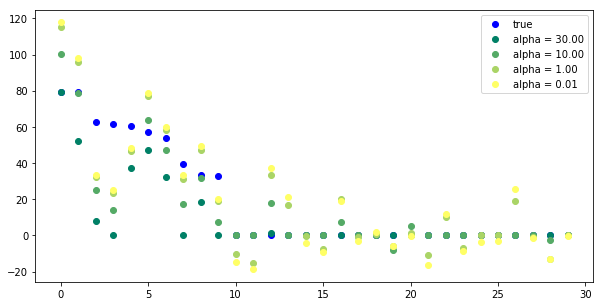

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([30, 10, 1, .01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best") 

## Linear Models for Classification
* These models learn a coefficient and an intercept; target variable (y) is qualitative, categorical
* Make a prediction as inner product of features and coefficients; 
* Resulting value is thresholded to zerio; to either predict class of +1 (y>0) or -1 (y<1)

y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_

### Differences between linear classification models
* What kind of regularization is put on the coefficients and intercept
* Minor differences in how the fit to the training set is measured; so-called "Loss function"
* Linear SVM, SVC both support L1 and L2 penalties

### Regularization in Classification Models: C
Parameter C in support vector classifier model (SVC); we can plot the influence of C in LinearSVC
* Small C (left) gives simple model, with high regularization; however, some points are misclassified
* Increasingly C allows for more complex models, classifier focuses on getting more data points right
* Large C (right) reduces misclassification, but decision function is quite skewed, may not reflect class boundaries anymore (e.g., blue point is misclassified as it is not possible to separate it from red points with a line.)

##### Take-home: Small C gives big picture, large C gives more weight to individual data points

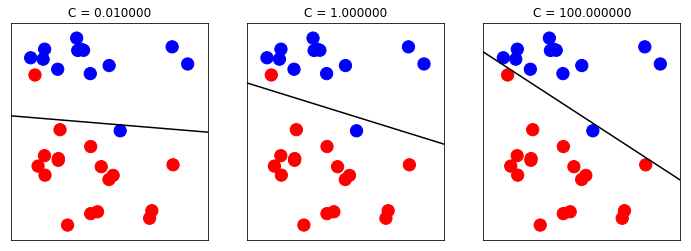

In [15]:
from figures import plot_linear_svc_regularization
plot_linear_svc_regularization()

## Multi-Class Linear Classification
* Example: three-class toy dataset, scattered, with three features being the two axes
* If we fit the LinearSVC oefficients have shape 3 x 2, and intercept is an array with 3 entries
* Three separate classifiers are learned, each one separating one class from the other two 

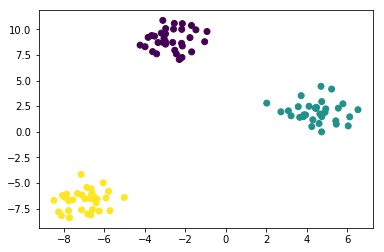

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [19]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


### Visualize the three decision boundaries using the coefficients and intercept

(-10, 8)

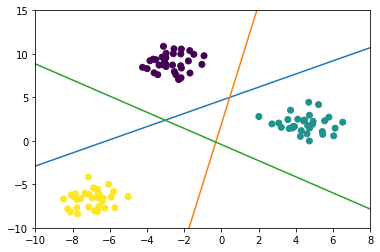

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y)
line = np.linspace(-15, 15)
for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
plt.ylim(-10, 15)
plt.xlim(-10, 8)